In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Project Idea
This project is at a friends request who is a Liquor Distributor.

He distributes to two diffrent categories of customers: Liquor Stores and Restaurants. Each have a fudementally different rate of calling in for a restock. 

We wanted to know how, how many calls could he expect a day and what is the distibution of calls per day. 

In [2]:
#number of liquor stores customers 
n = 70
#number of resturaunts customers 
m = 25

#follows array(liquor, resturaunts)
N = np.array([n,m])

#total customers
T = np.sum(N)

#weeks on average until call for service
weeks = np.array([2,6])
prob = 1/(7*weeks)


## Method 1: Simulation 

In [3]:
#one simulation
liquor_one = np.sum(np.random.rand(n)<prob[0])
restur_one = np.sum(np.random.rand(m)<prob[1])
busyness_one = liquor_one + restur_one

In [4]:
# k many days of simulation
k = 10000000
Service_req = np.zeros((k,2)) 
Service_req[:,0] = np.sum(np.random.rand(k,n)<prob[0], axis = 1)
Service_req[:,1] = np.sum(np.random.rand(k,m)<prob[1], axis = 1)
Busyness = np.sum(Service_req, axis = 1)

In [5]:
num, prevalance = np.unique(Busyness, return_counts = True)

In [6]:
S = np.sum(prevalance)
print(S)

10000000


Percentages of each possibility: (left out much higher but unlikley possibilities)

In [7]:
num

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [8]:
dist = (prevalance/k)*100
np.set_printoptions(suppress=True)
dist

array([ 0.30397,  1.83244,  5.44207, 10.56829, 15.29855, 17.45482,
       16.42018, 13.06903,  8.96209,  5.40907,  2.88378,  1.38794,
        0.60308,  0.23797,  0.08613,  0.02889,  0.00851,  0.00246,
        0.00053,  0.00017,  0.00002,  0.00001])

In [9]:
## plt.hist(Busyness, bins = T+1, density = True)
##plt.show()

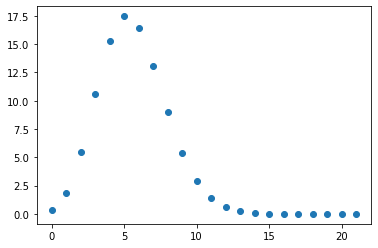

In [10]:
plt.scatter(num,dist)
plt.show()

In [11]:
np.dot(N,prob)

5.595238095238095

In [12]:
np.dot(num, dist)/100

5.5953863

In [13]:
weights  = N/T
weights

array([0.73684211, 0.26315789])

## Method 2: Analysis

Alternate Approach, 
here Busyness is a sum of Liquor and Resturaunt service calls "L" and "R", Stochastic Variables:
$$B = L + R$$
$$
 0 \leq i \leq 95, i \in \mathbb{N}$$
$$
P(i = B) = P(i = L + R) = \sum_{k = 0} ^ i P(L = k)*P(R = i - k)
$$
$$
P(B = i) = \sum_{k = 0} ^ i \binom{70}{k} (p_1)^k (q_1)^{70-k} \binom{25}{i-k}(p_2)^{i-k}(q_2)^{25-(i-k)}
$$

## Comparison:
As an example let's try $i = 5$ using our formula and compare it with our simulation results.

In [14]:
import scipy.stats as sy

In [15]:
i = 5
sum = 0
for k in range(i+1):
    add = sy.binom.pmf(k,70,prob[0])*sy.binom.pmf(i-k,25,prob[1])
    sum = sum + add
sum


0.17467250860559186

In [16]:
dist[i]/100

0.1745482

In [17]:
def prob_busy(i,p1,p2,n1,n2):
    sum = 0
    for k in range(i+1):
        add = sy.binom.pmf(k,n1,p1)*sy.binom.pmf(i-k,n2,p2)
        sum = sum + add
    return sum

In [18]:
prob_busy(10,prob[0],prob[1],N[0],N[1])

0.02892171239965778

In [19]:
Dist_exp = np.zeros(T+1)
for i in range(T+1):
    Dist_exp[i] = prob_busy(i,prob[0],prob[1],N[0],N[1])
    
Dist_exp

array([0.00305799, 0.01833074, 0.05428458, 0.10587841, 0.15299141,
       0.17467251, 0.16411486, 0.13049967, 0.08963973, 0.05402513,
       0.02892171, 0.01388936, 0.00603261, 0.00238588, 0.00086421,
       0.00028811, 0.00008878, 0.00002538, 0.00000676, 0.00000168,
       0.00000039, 0.00000009, 0.00000002, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
dist/100

array([0.0030397, 0.0183244, 0.0544207, 0.1056829, 0.1529855, 0.1745482,
       0.1642018, 0.1306903, 0.0896209, 0.0540907, 0.0288378, 0.0138794,
       0.0060308, 0.0023797, 0.0008613, 0.0002889, 0.0000851, 0.0000246,
       0.0000053, 0.0000017, 0.0000002, 0.0000001])

Now the both distrubutions:

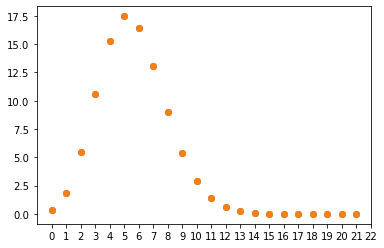

In [21]:
plt.xticks(range(num.size+1))
plt.scatter(num,Dist_exp[:num.size]*100)
plt.scatter(num,dist)
plt.show()